In [51]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Question 13

In [5]:
## Import Stock Market Data

## Import advertisting dataset
smarket = pd.read_csv('..\..\datasets\Weekly.csv', index_col='Unnamed: 0')
display(smarket)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1085,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1086,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1087,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1088,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [7]:
## a) Produce some numerical and graphical summaries of the data. Do there appear to be any patterns?

smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [8]:
smarket.corr()

## Volume highly correlated with year
## Market expected to fall a week after it rises, but correct again on the second week. Correlation is very weak

C:\Users\lucas\AppData\Local\Temp\ipykernel_21684\3443607407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  smarket.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [12]:
smarket.Direction.value_counts()

## Market went up ~ 60% of weeks over the time from 1990 to 2010

Up      605
Down    484
Name: Direction, dtype: int64

In [13]:
## b) Perform a logistic regression with 5 lag variables and Volume as predictiors

## Statsmodels requires you add your own constant
X = smarket.drop(columns=['Year', 'Direction', 'Today'])
X = sm.add_constant(X)

## Binarize the categorical response
y = smarket['Direction'].replace({'Up':1, 'Down': 0})

## Fit Logistic Regression model
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

## Lag 2 appears to be statistically significant

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                0.006580
Time:                        12:07:50   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

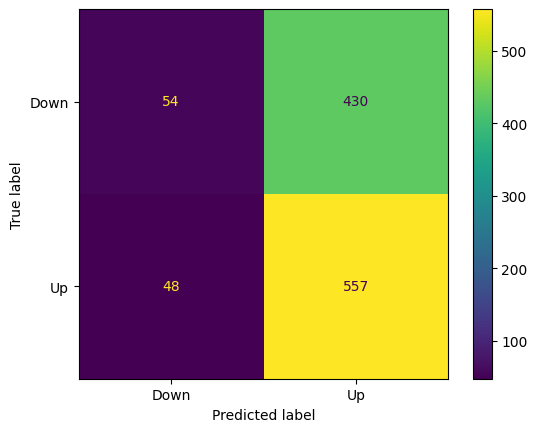

In [36]:
## c) Compute the confusion matrix and overall fraction of correct predictions

y_preds = log_reg.predict(X)
y_preds = y_preds.round(0)

cm = confusion_matrix(y, y_preds)

disp = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
disp.plot()
plt.show()

## Logistic Regression is highly biased in predicting that the market will go up

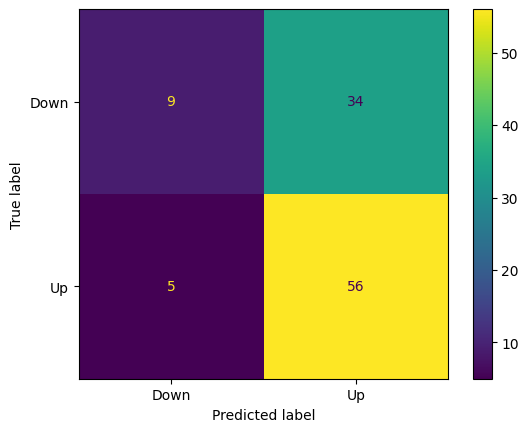

In [40]:
## d) Fit Logisitc Regression Model with training data from 1998 to 2008, with only Lag 2 as predictor. Compute confusion matrix on test data

## Train/Test Split
## In the book, they split the data on date. While this isn't best practice, I've decided to follow along
## Will not use sklearn.train_test_split because of this

train = smarket.loc[smarket['Year'] < 2009]
test = smarket.loc[smarket['Year'] >= 2009]

X_train = train.drop(columns=['Year', 'Direction', 'Today', 'Lag1', 'Lag3', 'Lag4', 'Lag5', 'Volume'])
X_test = test.drop(columns=['Year', 'Direction', 'Today', 'Lag1', 'Lag3', 'Lag4', 'Lag5', 'Volume'])

y_train = train['Direction']
y_test = test['Direction']

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
disp.plot()
plt.show()

## Logisitc Regression is still highly biased to predicting up.

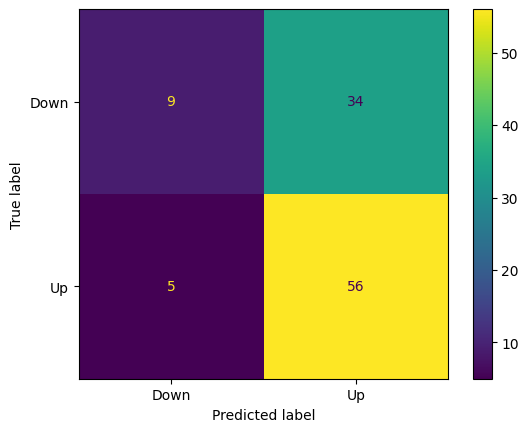

In [42]:
## e) Repeat using LDA

clf = LinearDiscriminantAnalysis().fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
disp.plot()
plt.show()

## LDA has the same results as LDA

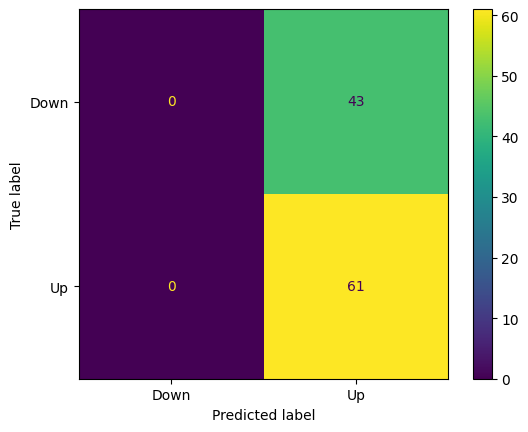

In [44]:
## f) Repeat using QDA

clf = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
disp.plot()
plt.show()

## QDA doesn't ever predict that the market will go down

Feature Name Order:
 ['Lag2'] 



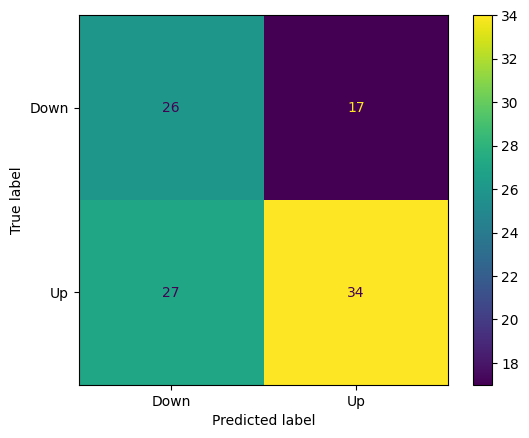

Accuracy:
 0.5769230769230769


In [50]:
## g) Repeat with KNN = 1

scaler = StandardScaler()
encoder = LabelEncoder()

X = scaler.fit_transform(X)
y = encoder.fit_transform(y)

clf = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Feature Name Order:\n', clf.feature_names_in_, '\n')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
disp.plot()
plt.show()

print(f'Accuracy:\n', accuracy_score(y_test,y_pred))

## KNN does a slighly better job than previous methods. A KNN of 4 performs very well. Better than random guessing

Feature Name Order:
 ['Lag2'] 

Prior Probs:
 [0.44771574 0.55228426] 

Class Means:
 [[-0.03568254]
 [ 0.26036581]] 



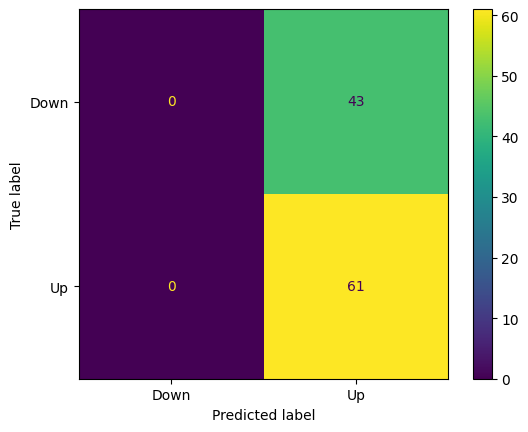

In [52]:
## h) Repeat with Naive Bayes

clf = GaussianNB().fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Feature Name Order:\n', clf.feature_names_in_, '\n')

print('Prior Probs:\n', clf.class_prior_, '\n')

print('Class Means:\n', clf.theta_, '\n')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
disp.plot()
plt.show()